# **DATA-DRIVEN WATER POTABILITY PREDICTION USING SUPERVISED MACHINE LEARNING MODELS**

---
by

KARTHIK VEDANTAM

M V SRI HARSHA


# **Problem Statement: Predicting Water Potability Using Physicochemical Parameters**

This project aims to develop a machine learning model to predict the potability of water based on measurable physicochemical properties.

Using a dataset containing key water quality indicators such as pH, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, and turbidity, the goal is to accurately classify whether a water sample is potable or non-potable.

# We have the following columns in our dataset

1.	ph – The pH level of the water, indicating its acidity or alkalinity (typically ranges from 0 to 14, with 7 being neutral).
2.	Hardness – The concentration of dissolved minerals (mainly calcium and magnesium) in water, measured in mg/L.
3.	Solids – The total dissolved solids (TDS) in water, measured in ppm (parts per million).
4.	Chloramines – The concentration of chloramines (compounds of chlorine and ammonia) used for disinfection, measured in mg/L.
5.	Sulfate – The concentration of sulfate ions in water, which can affect taste and scaling, measured in mg/L.
6.	Conductivity – The water’s ability to conduct electricity, which indicates the presence of dissolved salts and minerals, measured in µS/cm (microsiemens per centimeter).
7.	Organic_carbon – The total organic carbon (TOC) in water, indicating the presence of organic matter, measured in mg/L.
8.	Trihalomethanes – The concentration of trihalomethanes (THMs), which are byproducts of chlorine disinfection and can be harmful, measured in µg/L.
9.	Turbidity – The cloudiness or haziness of the water caused by suspended particles, measured in NTU (Nephelometric Turbidity Units).
10.	Potability – Indicates whether the water is safe for drinking (1 = Potable, 0 = Not Potable).



# Table of Contents

1.Import libraries

2.Import dataset

3.Exploratory data analysis

4.visualising the data

5.Feature engineering

6.Feature scaling

7.Splittimg data into separate training and test set

9.Model training

10.Predict results

11.Check accuracy score

12.Confusion matrix

13.Classification

14.ROC - AUC

15.Conclusion

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datset

In [ ]:
df=pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Getiing the information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# **Data Wranging**

# *Feature Engineering*

# *Handling Missing Values*

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
df.isnull().mean()*100

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


Replacing 1 with yes and 0 with no

In [ ]:
df['Potability']=df['Potability'].replace(0,'no')
df['Potability']=df['Potability'].replace(1,'yes')

In [ ]:
for col in df.select_dtypes(include='number'):
  print(col)

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


### Filling the null values by using interpolation

In [ ]:
for col2 in df.select_dtypes(include='number'):
    df[col2] = df[col2].interpolate()

In [ ]:
df.isnull().sum()

,0
ph,1
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Here ph has first value as null now using mean because we can't use interpolation


In [ ]:
df['ph'].fillna(df['ph'].mean(),inplace=True)
df.isnull().sum()

/tmp/ipython-input-10-2642681389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(),inplace=True)


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# **EXPOLERATIVE DATA ANALYSIS**

# **Summary of Features**

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.070022,196.369496,22014.092526,7.122277,333.741509,426.205111,14.284970,66.461927,3.966786
std,1.533268,32.879761,8768.570828,1.583085,38.870128,80.824064,3.308162,15.980497,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.121149,176.850538,15666.690297,6.127421,310.174409,365.734414,12.065801,55.988340,3.439711
50%,7.035894,196.967627,20927.833607,7.130299,332.960442,421.884968,14.218338,66.691179,3.955028
75%,7.992100,216.667456,27332.762127,8.114887,357.388145,481.792304,16.557652,77.215957,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


### **Average composition of Water Potability for 'Yes' and 'no'**

In [ ]:
e=df.drop(['Potability'],axis=1)
df.groupby('Potability')[e.columns].mean()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
no,7.074459,196.733292,21777.490788,7.092175,334.469234,426.730454,14.364335,66.290394,3.965800
yes,7.063084,195.800744,22383.991018,7.169338,332.603798,425.383800,14.160893,66.730100,3.968328


#**Top 5 composition of Potability 'yes'**

In [ ]:
df[df['Potability'] == 'yes'].sort_values('Solids', ascending=False).head(5)



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1554,8.942046,215.673786,56488.672413,3.231438,129.000000,541.915468,9.313771,70.828374,4.354288,yes
1186,9.484703,122.906991,56351.396304,4.219711,219.553437,480.848063,13.533433,41.731219,4.132274,yes
3150,6.563357,241.286323,56320.586979,5.365558,384.658062,415.817219,11.651929,70.637648,5.292950,yes
3162,9.079715,222.042631,53735.899194,6.894915,254.040977,382.896167,12.704887,101.615346,4.551724,yes
366,4.037288,291.461897,52318.917298,7.779459,264.576185,401.204271,16.542921,87.814800,3.045049,yes


### **Top 5 composition of Potability 'no'**

In [ ]:
df[df['Potability'] == 'no'].sort_values('Solids', ascending=False).head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2602,8.081688,159.399398,61227.196008,3.713594,312.976254,377.067972,17.246698,82.197233,3.860807,no
1031,5.375896,153.712874,56867.859236,7.894086,336.593215,493.888464,15.116023,57.712992,4.174220,no
1068,3.344589,156.479927,55334.702799,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,no
1784,9.252857,168.040751,50279.262429,5.905056,415.450810,400.003589,11.949854,62.256881,3.300586,no
3014,0.000000,214.846144,49456.587108,7.897539,321.839123,583.448849,7.702328,77.712891,4.928840,no


##**Checking for outliers**

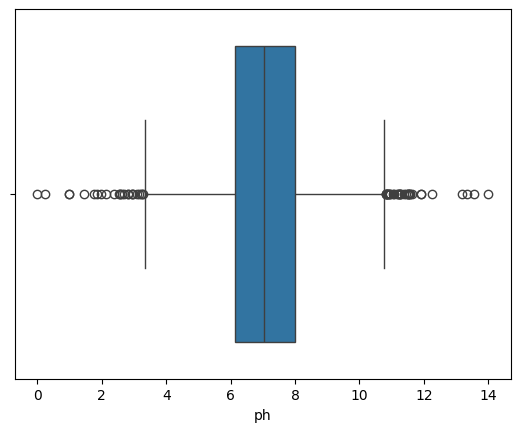

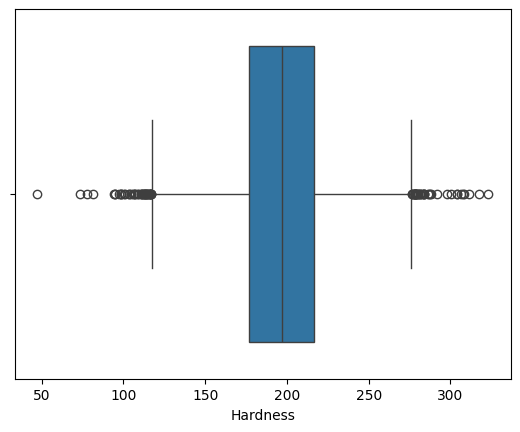

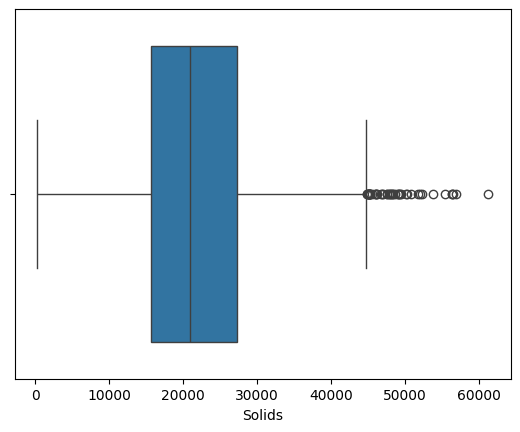

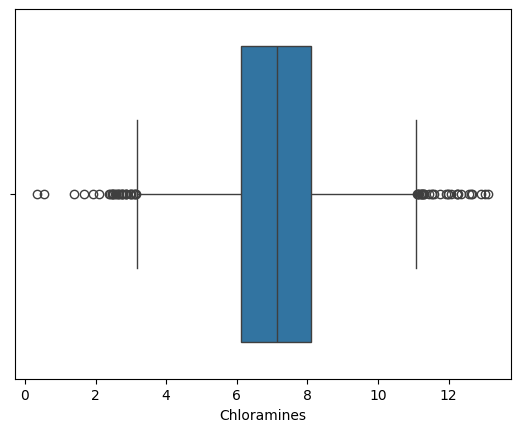

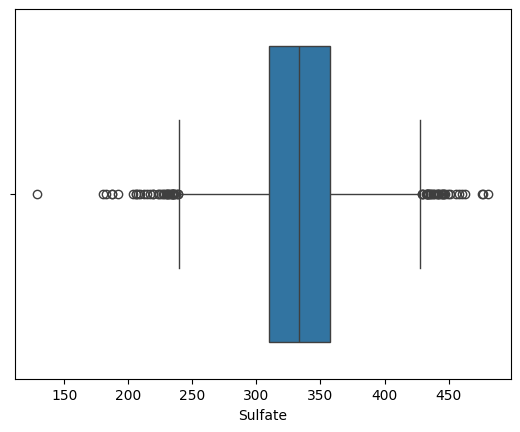

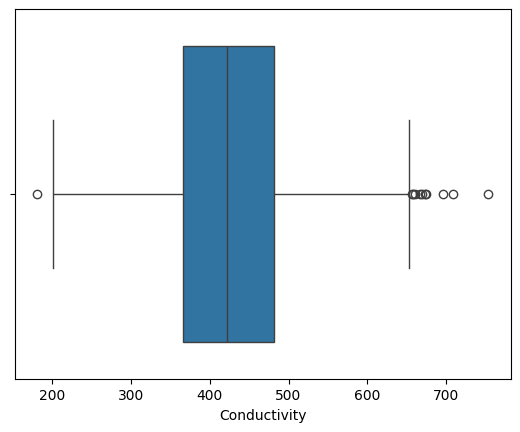

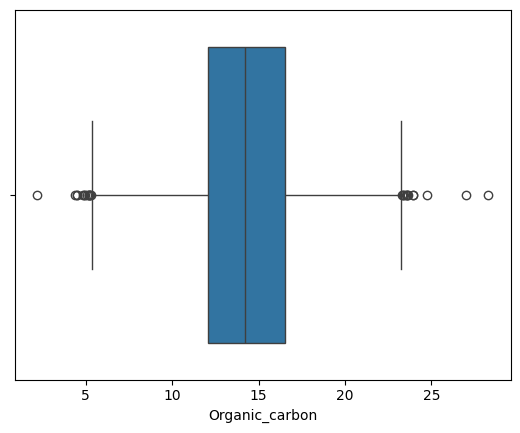

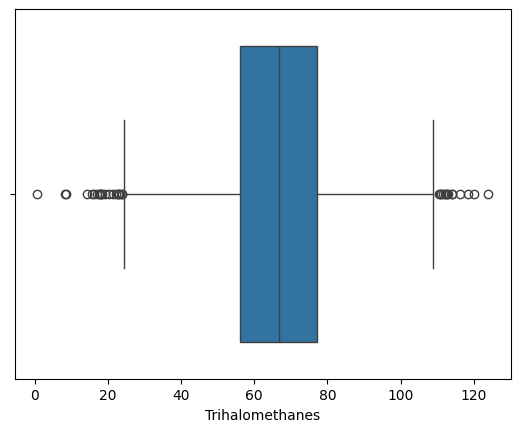

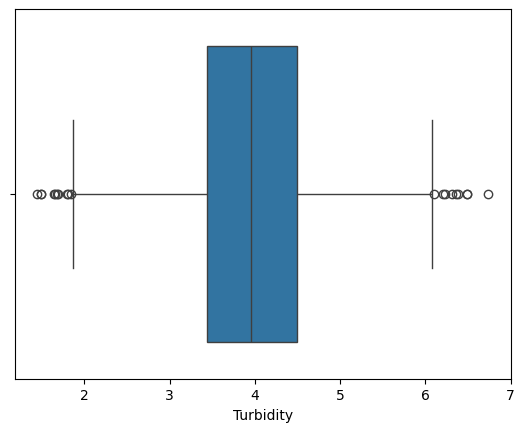

In [ ]:
for col3 in df.select_dtypes(include='number'):
    sns.boxplot(x=df[col3])
    plt.show()

In [ ]:
def outlier_percentage_iqr(df):
    outlier_summary = {}
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        percent = (len(outliers) / len(df)) * 100
        outlier_summary[col] = round(percent, 2)
    return pd.Series(outlier_summary).sort_values(ascending=False)

In [ ]:
outlier_percentage_iqr(df)

,0
Hardness,2.53
Sulfate,2.17
Chloramines,1.86
ph,1.83
Solids,1.43
Trihalomethanes,1.07
Organic_carbon,0.76
Turbidity,0.58
Conductivity,0.34


In [ ]:
# for col3 in df.select_dtypes(include='number'):
#   q1=df[col3].quantile(0.25)
#   q3=df[col3].quantile(0.75)
#   iqr=q1-q3
#   lower_bound=q1-1.5*iqr
#   upper_bound=q3+1.5*iqr
#   df[col3]=df[col3].clip(lower=lower_bound,upper=upper_bound)

# Visualisation

Text(0.5, 1.0, 'Potability distribution')

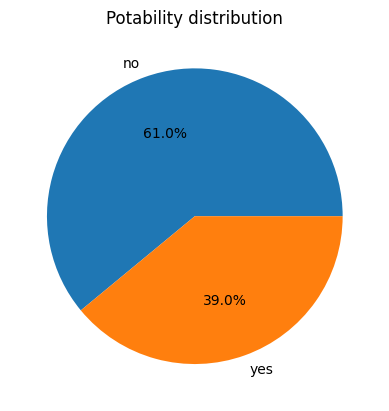

In [ ]:
values=df['Potability'].value_counts()
plt.pie(values,labels=values.index,autopct='%1.1f%%')
plt.title('Potability distribution')

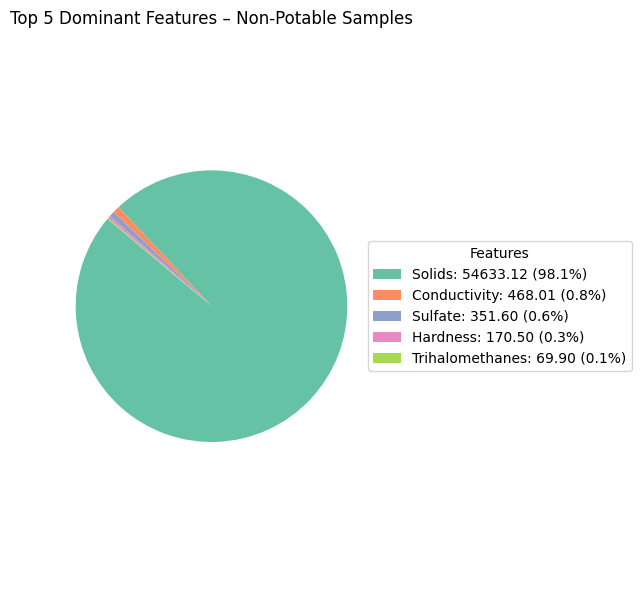

In [ ]:
# Get top 5 non-potable samples by 'Solids'
top5_non_potable = df[df['Potability'] == 'no'].nlargest(5, 'Solids')
# Drop 'Potability' column and calculate average
avg_values = top5_non_potable.drop(columns='Potability').mean().round(2)
# Get top 5 features only
top5_features = avg_values.sort_values(ascending=False).head(5)
# Calculate total for percentage
total = top5_features.sum()
# Create labels with value and %
labels = [f"{f}: {v:.2f} ({(v/total)*100:.1f}%)" for f, v in top5_features.items()]
# Pie chart without slice labels, with legend instead
colors = sns.color_palette('Set2', len(top5_features))
plt.figure(figsize=(6, 6))
wedges, _ = plt.pie(top5_features, startangle=140, colors=colors)
# Add legend
plt.legend(wedges, labels, title="Features", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title("Top 5 Dominant Features – Non-Potable Samples")
plt.axis('equal')
plt.tight_layout()
plt.show()


Insight: Dominant factors like Solids, Sulfate, Hardness consistently spike in unsafe water.

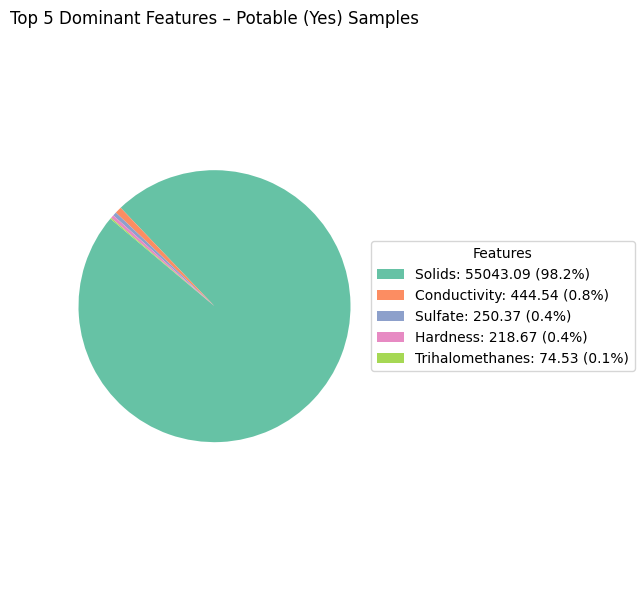

In [ ]:
top5_potable = df[df['Potability'] == 'yes'].nlargest(5, 'Solids')
avg_values = top5_potable.drop(columns='Potability').mean().round(2)
top5_features = avg_values.sort_values(ascending=False).head(5)
total = top5_features.sum()
labels = [f"{feature}: {value:.2f} ({(value/total)*100:.1f}%)" for feature, value in top5_features.items()]
colors = sns.color_palette('Set2', len(top5_features))
plt.figure(figsize=(6, 6))
wedges, _ = plt.pie(top5_features, startangle=140, colors=colors)
plt.legend(wedges, labels, title="Features", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title("Top 5 Dominant Features – Potable (Yes) Samples")
plt.axis('equal')
plt.tight_layout()
plt.show()


 Potable water is dominated by Solids, Conductivity, and Hardness — all present in balanced levels that reflect safe and well-treated water.


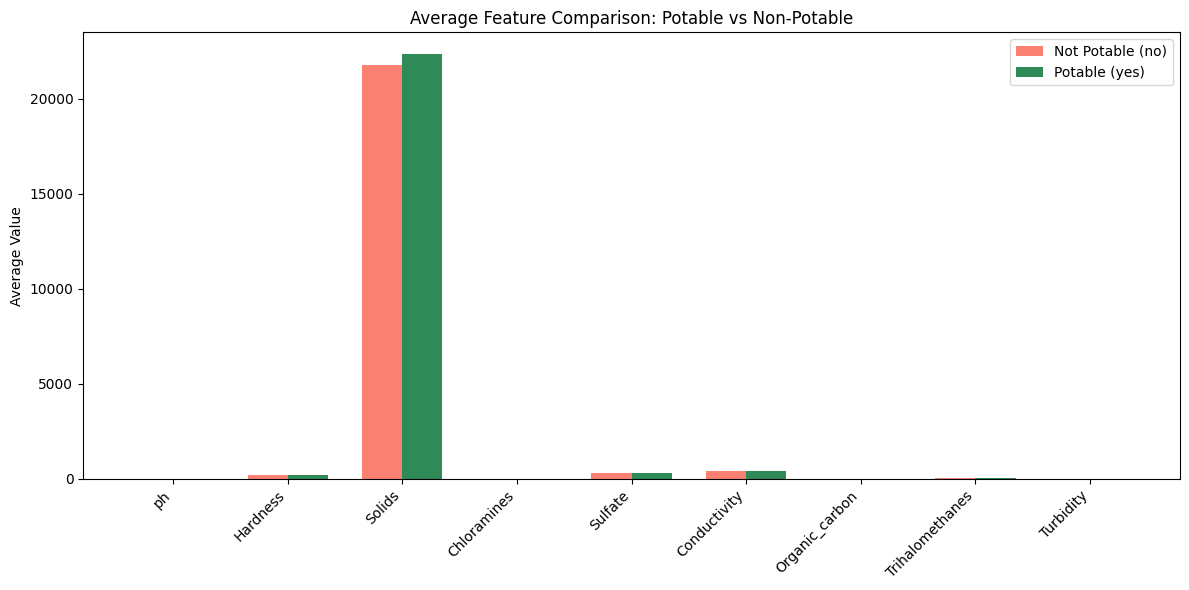

In [ ]:
mean_yes = df[df['Potability'] == 'yes'].drop(columns='Potability').mean()
mean_no = df[df['Potability'] == 'no'].drop(columns='Potability').mean()
features = mean_yes.index
x = np.arange(len(features))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, mean_no, width, label='Not Potable (no)', color='salmon')
plt.bar(x + width/2, mean_yes, width, label='Potable (yes)', color='seagreen')
plt.xticks(ticks=x, labels=features, rotation=45, ha='right')
plt.ylabel("Average Value")
plt.title("Average Feature Comparison: Potable vs Non-Potable")
plt.legend()
plt.tight_layout()
plt.show()


 Potable water has lower solids, balanced chloramines, and more stable chemical properties compared to non-potable water.

/tmp/ipython-input-23-1493565696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_risk_factors.index, y=top_risk_factors.values, palette='Reds_r')


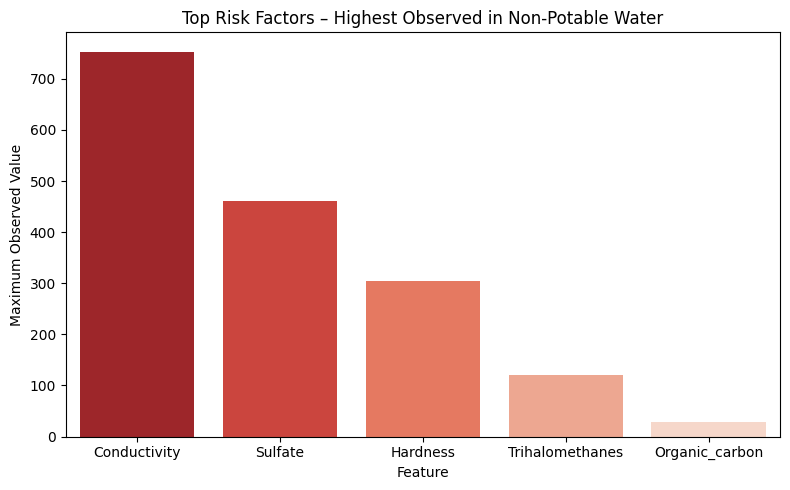

In [ ]:
non_potable = df[df['Potability'] == 'no']
risk_factors = non_potable.drop(columns=['Potability', 'Solids']).max().sort_values(ascending=False)
top_risk_factors = risk_factors.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_risk_factors.index, y=top_risk_factors.values, palette='Reds_r')
plt.title("Top Risk Factors – Highest Observed in Non-Potable Water")
plt.xlabel("Feature")
plt.ylabel("Maximum Observed Value")
plt.tight_layout()
plt.show()


Hardness, Sulfate, and Conductivity are the most extreme in unsafe samples, pushing values well beyond safe drinking levels."

/tmp/ipython-input-24-1626626825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_risk_factors_yes.index, y=top_risk_factors_yes.values, palette='Greens')


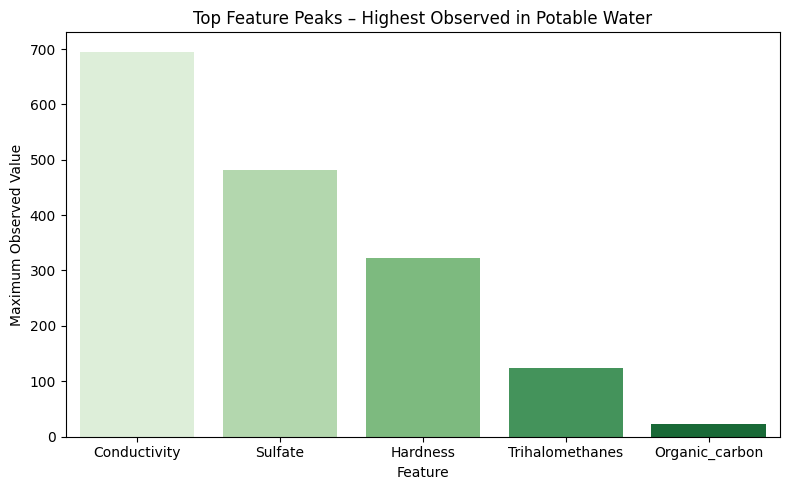

In [ ]:
potable = df[df['Potability'] == 'yes']
risk_factors_yes = potable.drop(columns=['Potability', 'Solids']).max().sort_values(ascending=False)
top_risk_factors_yes = risk_factors_yes.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_risk_factors_yes.index, y=top_risk_factors_yes.values, palette='Greens')
plt.title("Top Feature Peaks – Highest Observed in Potable Water")
plt.xlabel("Feature")
plt.ylabel("Maximum Observed Value")
plt.tight_layout()
plt.show()


Even in potable water, features like Conductivity, Hardness, and Sulfate reach high levels, but remain within safe thresholds



/tmp/ipython-input-25-3356350135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Potability', y='Solids', palette='coolwarm')


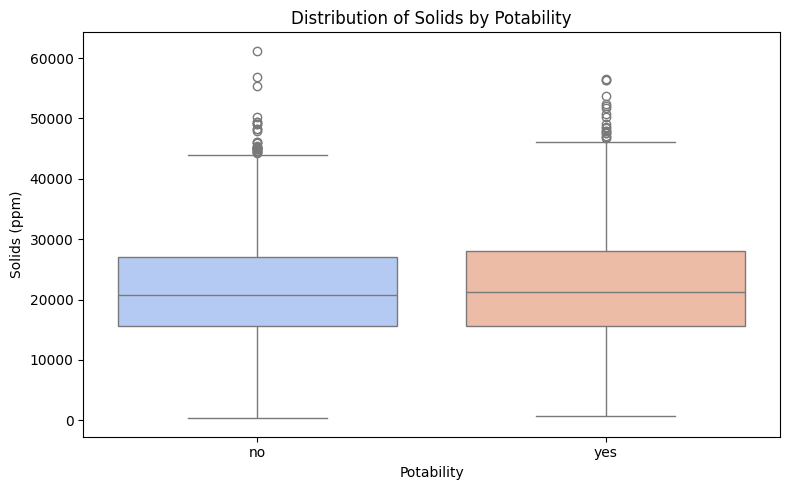

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Potability', y='Solids', palette='coolwarm')
plt.title("Distribution of Solids by Potability")
plt.xlabel("Potability")
plt.ylabel("Solids (ppm)")
plt.tight_layout()
plt.show()


Solids are significantly higher and more volatile in non-potable water, often exceeding 60,000 ppm."



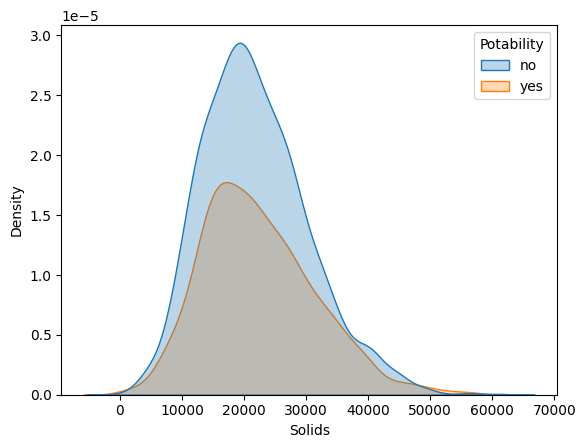

In [ ]:
sns.kdeplot(x='Solids', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Non-potable water has significantly higher and more spread-out Solids levels, indicating greater contamination.

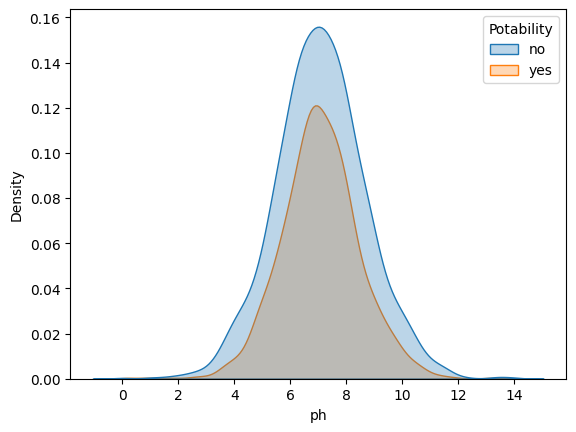

In [ ]:
sns.kdeplot(x='ph', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Potable water is mostly clustered around a neutral pH of 6.5 to 8, while non-potable water shows wider spread including more acidic (low pH) and alkaline (high pH) extremes, indicating imbalance

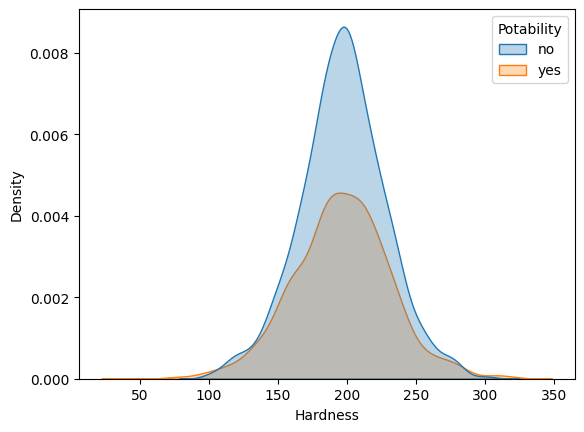

In [ ]:
sns.kdeplot(x='Hardness', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Both potable and non-potable water overlap in Hardness, but potable samples slightly cluster around lower hardness (150–200 mg/L), suggesting that excessively hard water is more likely to be non-potable.

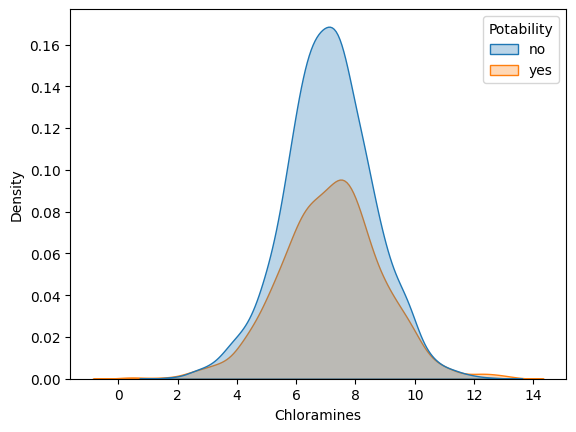

In [ ]:
sns.kdeplot(x='Chloramines', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Potable water tends to have moderate Chloramines levels (~7–9 ppm), while non-potable samples show a broader distribution, including lower concentrations, which may indicate insufficient disinfection.

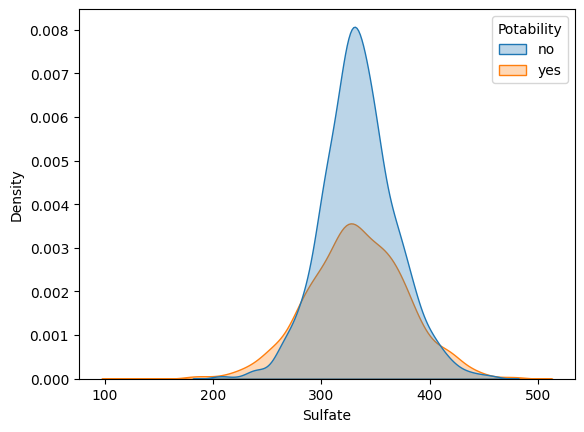

In [ ]:
sns.kdeplot(x='Sulfate', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Potable water is more concentrated around Sulfate levels of 300–400 mg/L, while non-potable water shows a wider and flatter spread, including both low and very high sulfate concentrations, indicating inconsistent mineral balance.

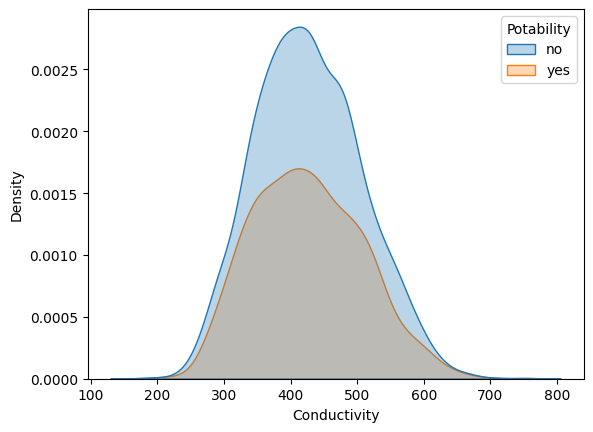

In [ ]:
sns.kdeplot(x='Conductivity', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Non-potable water generally shows higher conductivity, reflecting a greater presence of dissolved ions or salts, while potable water is more centered around moderate conductivity levels (~400–500 μS/cm)

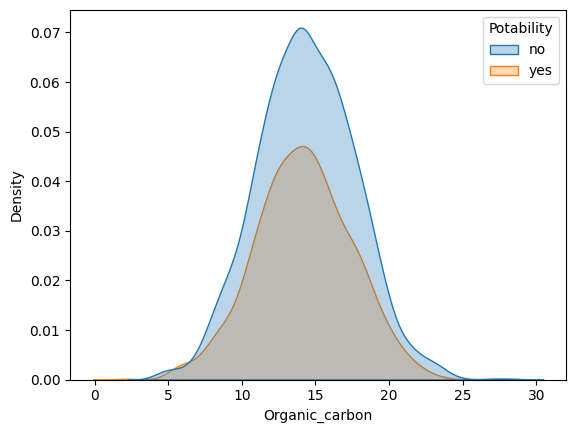

In [ ]:
sns.kdeplot(x='Organic_carbon', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

 Potable water tends to have moderate Organic Carbon levels (~10–18 mg/L), while non-potable water shows a broader spread, including higher concentrations, suggesting more organic contamination.

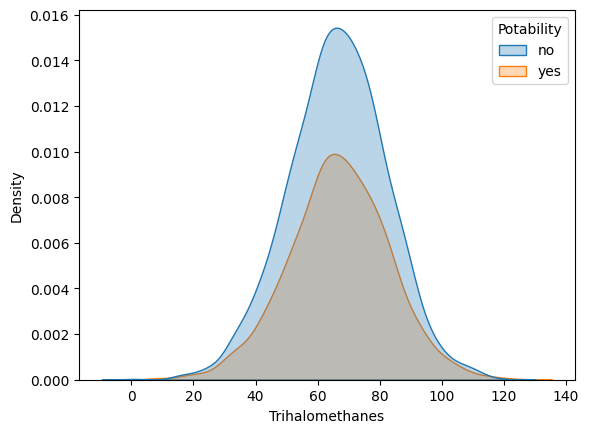

In [ ]:
sns.kdeplot(x='Trihalomethanes', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Potable water shows a peak in Trihalomethanes around 60–100 µg/L, while non-potable water has a wider and flatter distribution, indicating inconsistent disinfection by-products and possible safety concerns at both low and high extremes.


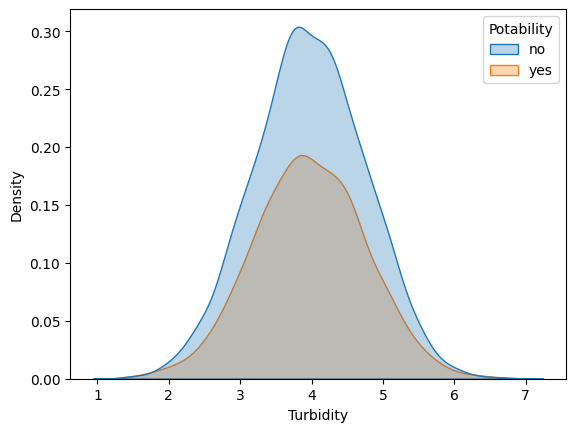

In [ ]:
sns.kdeplot(x='Turbidity', hue='Potability', data=df, fill=True, alpha=0.3)
plt.show()

Potable water is generally associated with moderate Turbidity levels (~3–4 NTU), while non-potable water shows a wider spread, including both lower and higher turbidity, indicating variability in water clarity and potential contamination.


# **Feature Scaling**

We can see our outlier percentages are very low (most < 3%) instead of handling we are doing robust scaling so that information won't be lost.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.018240,0.198981,-0.011702,0.085492,0.753086,1.227178,-0.854560,0.956292,-0.935210,no
1,-1.774399,-1.696382,-0.196962,-0.249088,0.670975,1.473406,0.214093,-0.488143,0.514449,no
2,0.568283,0.684850,-0.087287,1.079558,0.588864,-0.028251,0.590024,-0.012770,-0.847715,no
3,0.684610,0.437145,0.093483,0.467446,0.506753,-0.505079,0.939076,1.585223,0.635242,no
4,1.099082,-0.398477,-0.252771,-0.293690,-0.483434,-0.202262,-0.592197,-1.634342,0.113188,no
...,...,...,...,...,...,...,...,...,...,...
3271,-1.265556,-0.082525,2.284673,0.018285,0.571616,0.900750,-0.072113,-0.000164,0.453318,yes
3272,0.413138,-0.085753,-0.308418,0.468467,0.571616,-0.253627,1.265600,0.074213,-1.090680,yes
3273,1.274013,-0.532562,1.048146,0.110661,0.571616,0.087541,-0.707786,0.148590,-0.618656,yes
3274,-1.020407,0.844770,-0.766665,-0.416079,0.571616,-0.163727,-0.678872,0.508632,0.710564,yes


In [ ]:
outlier_percentage_iqr(df)

,0
Hardness,2.53
Sulfate,2.17
Chloramines,1.86
ph,1.83
Solids,1.43
Trihalomethanes,1.07
Organic_carbon,0.76
Turbidity,0.58
Conductivity,0.34


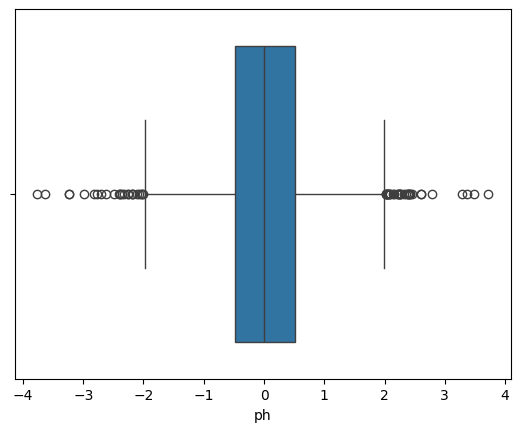

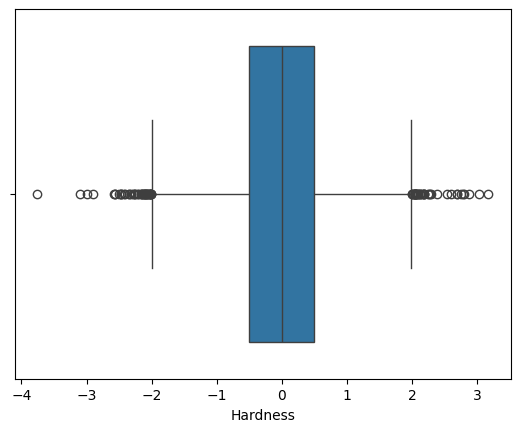

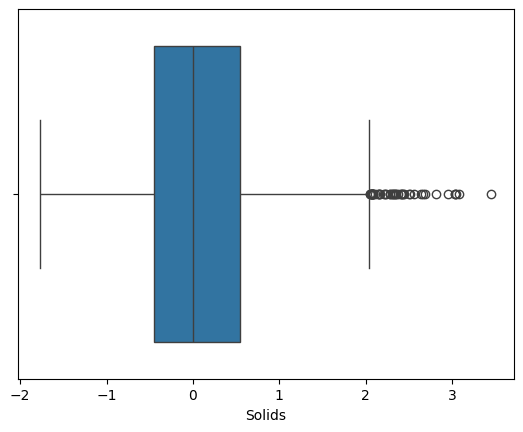

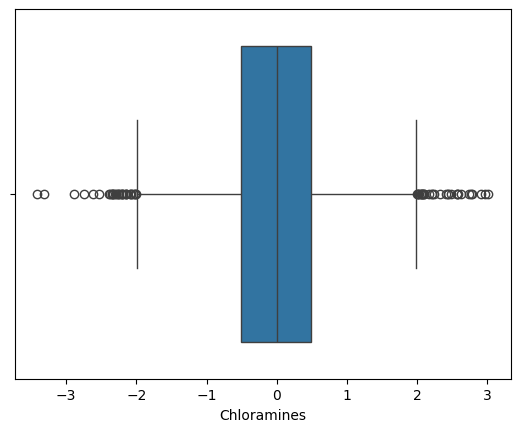

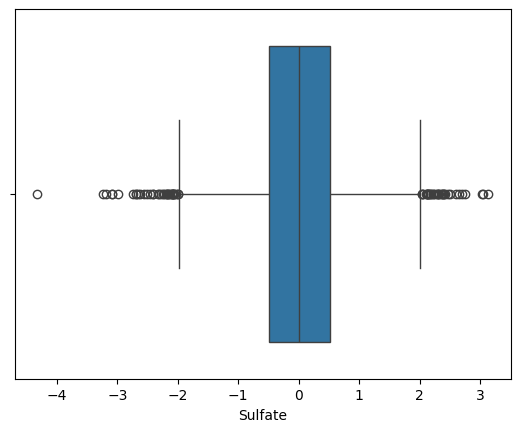

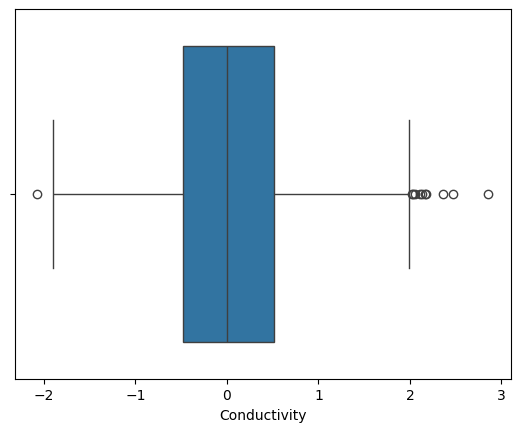

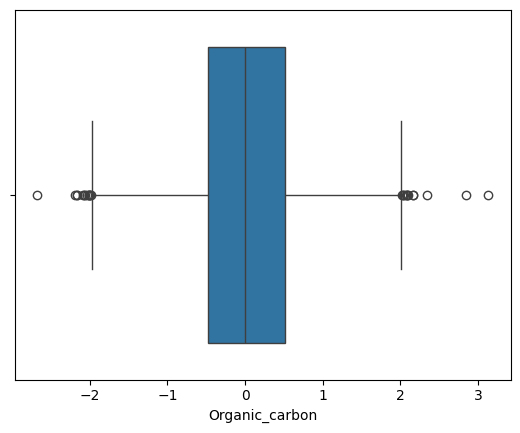

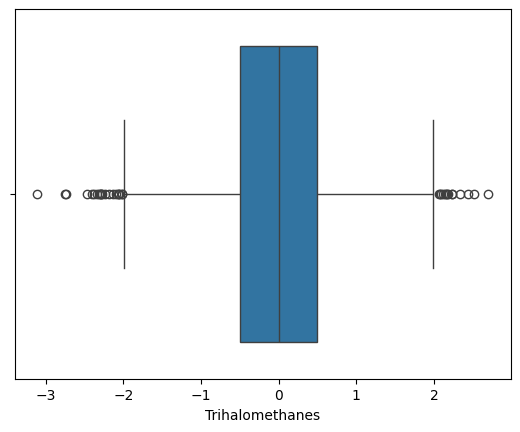

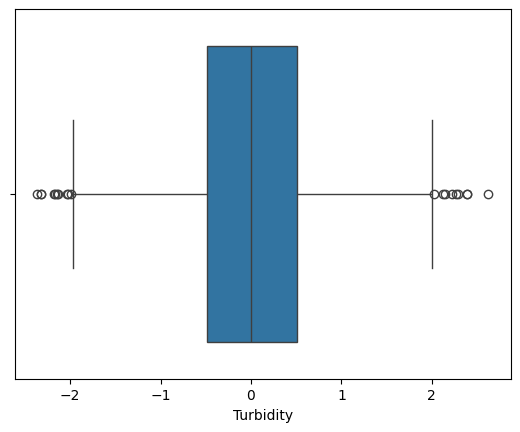

In [ ]:
for col4 in df.select_dtypes(include='number'):
 plt.figure()
 sns.boxplot(x=df[col4])

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
df['Potability']=label1.fit_transform(df['Potability'])

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.018240,0.198981,-0.011702,0.085492,0.753086,1.227178,-0.854560,0.956292,-0.935210,0
1,-1.774399,-1.696382,-0.196962,-0.249088,0.670975,1.473406,0.214093,-0.488143,0.514449,0
2,0.568283,0.684850,-0.087287,1.079558,0.588864,-0.028251,0.590024,-0.012770,-0.847715,0
3,0.684610,0.437145,0.093483,0.467446,0.506753,-0.505079,0.939076,1.585223,0.635242,0
4,1.099082,-0.398477,-0.252771,-0.293690,-0.483434,-0.202262,-0.592197,-1.634342,0.113188,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.265556,-0.082525,2.284673,0.018285,0.571616,0.900750,-0.072113,-0.000164,0.453318,1
3272,0.413138,-0.085753,-0.308418,0.468467,0.571616,-0.253627,1.265600,0.074213,-1.090680,1
3273,1.274013,-0.532562,1.048146,0.110661,0.571616,0.087541,-0.707786,0.148590,-0.618656,1
3274,-1.020407,0.844770,-0.766665,-0.416079,0.571616,-0.163727,-0.678872,0.508632,0.710564,1


#**Model Preparation**

#**Spliting the data into Traning and Testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(['Potability'],axis=1)
y=df['Potability']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# check the shape of X_train and X_val
X_train.shape, X_val.shape

((2620, 9), (656, 9))

#**Class balancing using Over Sampling**


In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# os = RandomOverSampler(sampling_strategy=0.75)
# X_train,y_train=os.fit_resample(X_train,y_train)

#**Training SVM Model**

In [ ]:
# Importing SVM Model
from sklearn.svm import SVC
#Initializing
svc=SVC(C=1, kernel='rbf')
#Fitting the model
svc.fit(X_train, y_train)

SVC(C=1)

In [ ]:
from sklearn.metrics import accuracy_score
# Predicting results
y_pred = svc.predict(X_val)
#Checking Model accuracy
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy for SVM Model is: {acc}")

Accuracy for SVM Model is: 0.7042682926829268


In [ ]:
y_pred_train =svc.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7393


In [ ]:
y_pred_test =svc.predict(X_val)
y_pred_test
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_val, y_val)))

Training set score: 0.7393
Test set score: 0.7043


 These two values are quite comparable. So, there is no overfitting.

#Compare model accuracy with null accuracy

In [ ]:
# check class distribution in test set

y_val.value_counts()

,count
Potability,
0,412
1,244


In [ ]:
# check null accuracy score
null_accuracy = (617/(617+366))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6277


##Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[375  37]
 [157  87]]

True Positives(TP) =  375

True Negatives(TN) =  87

False Positives(FP) =  37

False Negatives(FN) =  157


<Axes: >

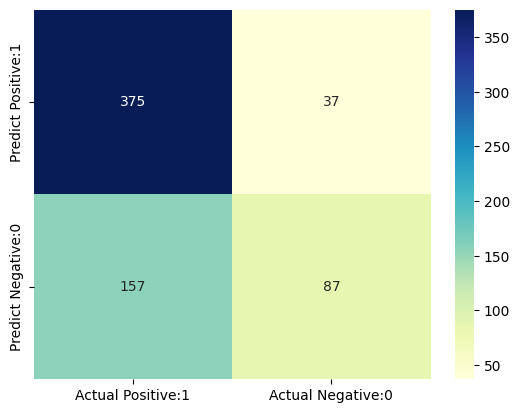

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.70      0.36      0.47       244

    accuracy                           0.70       656
   macro avg       0.70      0.63      0.63       656
weighted avg       0.70      0.70      0.67       656



### Classification accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7043


**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.62042683 0.68244275 0.67480916 0.6259542  0.68244275]
Mean Accuracy: 0.6572151368460248
Standard Deviation: 0.027975132679511377


### Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2957


### Precision




In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9102


### Recall




In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7049


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7049


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2984


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7016


In [ ]:
from sklearn.svm import SVC

# Enable probability estimates
svc = SVC(probability=True)

# Fit the model
svc.fit(X_train, y_train)

# Now you can access predicted probabilities
y_pred_prob = svc.predict_proba(X_val)[0:10]
print(y_pred_prob)


[[0.80524766 0.19475234]
 [0.71022096 0.28977904]
 [0.74615171 0.25384829]
 [0.68202799 0.31797201]
 [0.43712224 0.56287776]
 [0.37721477 0.62278523]
 [0.55007859 0.44992141]
 [0.46871879 0.53128121]
 [0.5        0.5       ]
 [0.71464973 0.28535027]]


In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - potable water (1)', 'Prob of - non potable water (0)'])

y_pred_prob_df

,Prob of - potable water (1),Prob of - non potable water (0)
0,0.805248,0.194752
1,0.710221,0.289779
2,0.746152,0.253848
3,0.682028,0.317972
4,0.437122,0.562878
5,0.377215,0.622785
6,0.550079,0.449921
7,0.468719,0.531281
8,0.500000,0.500000
9,0.714650,0.285350


Text(0, 0.5, 'Frequency')

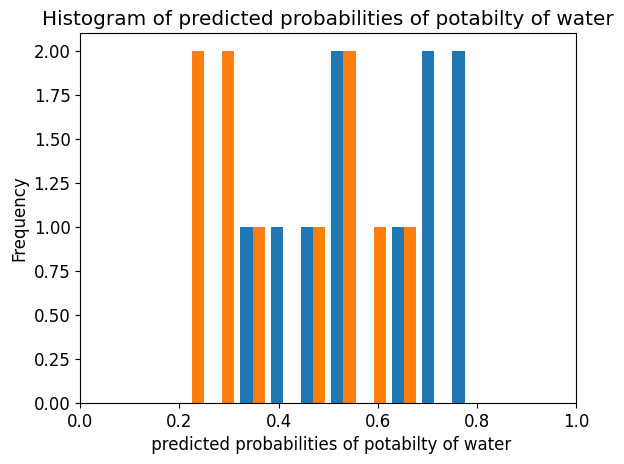

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_prob, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of potabilty of water')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel(' predicted probabilities of potabilty of water')
plt.ylabel('Frequency')

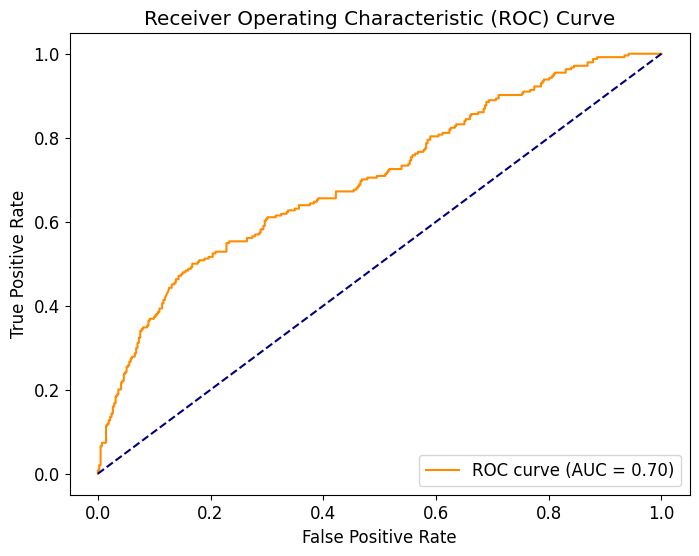

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Full predicted probabilities for class 1
y_pred_prob = svc.predict_proba(X_val)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc_score = roc_auc_score(y_val, y_pred_prob)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


purely random classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

print(" Building the model...")
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

print(" Compiling the model...")
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

print(" Starting training...")
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))

print("Training complete.")


 Building the model...
 Compiling the model...
 Starting training...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4901 - loss: 0.8088 - val_accuracy: 0.4954 - val_loss: 0.8058
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5074 - loss: 0.7680 - val_accuracy: 0.5107 - val_loss: 0.7781
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 0.7461 - val_accuracy: 0.5168 - val_loss: 0.7547
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.7538 - val_accuracy: 0.5274 - val_loss: 0.7349
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5092 - loss: 0.7257 - val_accuracy: 0.5320 - val_loss: 0.7193
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5170 - loss: 0.7186 - val_accuracy: 0.5412 - val_loss: 0.7068
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5414 - loss: 0.7006 - val_accuracy: 0.5427 - val_loss: 0.6967
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5521 - loss: 0.6906 - val_accuracy: 0.5595 - val_loss: 0.6888
Epo

In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n Final Validation Accuracy: {final_val_acc:.4f}")
print(f" Final Validation Loss: {final_val_loss:.4f}")



 Final Validation Accuracy: 0.6265
 Final Validation Loss: 0.6617


In [ ]:


data = {
    'Model Name': ['Logit Regressor', 'Deciscion Tree (ID3)', 'Deciscion Tree (CART)','Random Forest','ADABOOSting','GradientBoosting','XGboosting','SVM','KNN Classifier'],
    'Train Accuracy': [57.15,70.16,70.16,72.44,72.44,70.61,70.61,70.61,70.61],
    'Test Accuracy': [62.80,66.16,66.16,68.57,68.57,69.28,69.28,69.28,68.28],
    'Accuracy':[63,66,66,66,69,69,67,70,65]
}

df = pd.DataFrame(data)
print(df)


              Model Name  Train Accuracy  Test Accuracy  Accuracy
0        Logit Regressor           57.15          62.80        63
1   Deciscion Tree (ID3)           70.16          66.16        66
2  Deciscion Tree (CART)           70.16          66.16        66
3          Random Forest           72.44          68.57        66
4            ADABOOSting           72.44          68.57        69
5       GradientBoosting           70.61          69.28        69
6             XGboosting           70.61          69.28        67
7                    SVM           70.61          69.28        70
8         KNN Classifier           70.61          68.28        65


In [ ]:
 sample_data = {
     'ph': [6.92],
     'Hardness': [142.0],
     'Solids': [19367.0],
     'Chloramines': [6.84],
     'Sulfate': [336.88],
     'Conductivity': [364.92],
     'Organic_carbon': [8.85],
     'Trihalomethanes': [73.08],
     'Turbidity': [4.38]
 }


 random_input = pd.DataFrame(sample_data)

 # Apply scaling
 random_input_scaled = scaler.transform(random_input)

# Predict
 pred = svc.predict(random_input_scaled)
 prob = svc.predict_proba(random_input_scaled)[0][1]

 print("\n🔍 Prediction for Random Input")
 print("✅ Class (0 = Not Potable, 1 = Potable):", pred[0])
 print(f"🔢 Probability of being Potable: {prob*100:.2f}%")


🔍 Prediction for Random Input
✅ Class (0 = Not Potable, 1 = Potable): 0
🔢 Probability of being Potable: 42.48%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
sample_1 = {
    'ph': [7.65],
    'Hardness': [113.0],
    'Solids': [14957.0],
    'Chloramines': [6.03],
    'Sulfate': [300.17],
    'Conductivity': [432.82],
    'Organic_carbon': [11.56],
    'Trihalomethanes': [62.47],
    'Turbidity': [3.46]
}

random_input = pd.DataFrame(sample_1)

# Apply scaling
random_input_scaled = scaler.transform(random_input)

# Predict
pred = svc.predict(random_input_scaled)
prob = svc.predict_proba(random_input_scaled)[0][1]

print("\nPrediction for Random Input")
print("Class (0 = Not Potable, 1 = Potable):", pred[0])
print(f" Probability of being Potable: {prob*100:.2f}%")


Prediction for Random Input
Class (0 = Not Potable, 1 = Potable): 0
 Probability of being Potable: 53.61%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Conclusion
From the above models we can say SVM given us good accuracy when compared with other models.

The analysis helped in understanding the key factors that influence water potability. Machine learning models were applied to predict whether water is safe to drink or not. The results were satisfactory, and the models showed good performance. This approach can be useful in supporting decisions related to water quality and safety.